In [1]:
import pandas as pd
import numpy as np


Let load data of Cholera Outbreak Prediction (2000–2023)

In [3]:
df = pd.read_csv('Cholera_cases_2000_2023.csv')
df.head()

,Country,GTFCC_Target_Country,Continent,WHO_Region,Subregion,Year,Total_Cases,Autochtonous_Cases,Imported_Cases,Deaths,CFR,Incidence_Rate_perMillion
0,Afghanistan,Yes,Asia,EMRO,South Asia,2023,222249,222249,0,101,0.1,5842
1,Australia,No,Oceania,WPRO,East Asia and Pacific,2023,3,0,3,0,0.0,0
2,Bahrain,No,Asia,EMRO,Middle East and North Africa,2023,1,0,1,0,0.0,0
3,Bangladesh,Yes,Asia,SEARO,South Asia,2023,23369,23369,0,0,0.0,143
4,Benin,Yes,Africa,AFRO,West and Central Africa,2023,28,28,0,0,0.0,2


Check missing values

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Country                      0
GTFCC_Target_Country         0
Continent                    0
WHO_Region                   0
Subregion                    0
Year                         0
Total_Cases                  0
Autochtonous_Cases           0
Imported_Cases               0
Deaths                       0
CFR                          0
Incidence_Rate_perMillion    0
dtype: int64


Handle missing values

In [5]:
df['Deaths'].fillna(0, inplace=True)
df['CFR'] = (df['Deaths'] / df['Total_Cases']).replace(np.inf, 0) * 100
df['CFR'].fillna(0, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6800\4015742614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deaths'].fillna(0, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_6800\4015742614.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

Fix inconsistent formats

In [6]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')


Handle outliers , Feature engineering, Encode categorical variables and Save cleaned data

In [7]:
# Handle outliers
df = df[df['CFR'] <= 50]

# Feature engineering
df['Cases_per_Million'] = df['Incidence_Rate_perMillion']  # Already normalized
df['Outbreak_Size'] = pd.cut(df['Total_Cases'], 
                             bins=[0, 100, 1000, 10000, np.inf], 
                             labels=['Small', 'Medium', 'Large', 'Epidemic'])

# Encode categorical variables
df['WHO_Region_encoded'] = df['WHO_Region'].astype('category').cat.codes

# Save cleaned data
df.to_csv('cleaned_cholera_data.csv', index=False)

Exploratory Data Analysis (EDA)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Descriptive statistics

In [9]:
print(df[['Total_Cases', 'Deaths', 'CFR', 'Cases_per_Million']].describe())

        Total_Cases       Deaths          CFR  Cases_per_Million
count  1.093000e+03  1093.000000  1093.000000        1093.000000
mean   6.965471e+03    80.072278     2.085316         375.430924
std    4.676426e+04   297.002129     4.268641        2195.112302
min    1.000000e+00     0.000000     0.000000           0.000000
25%    8.000000e+00     0.000000     0.000000           0.000000
50%    2.070000e+02     2.000000     0.547945           7.000000
75%    2.028000e+03    33.000000     2.342116          94.000000
max    1.032481e+06  3990.000000    41.555977       35405.000000


Distribution of cases

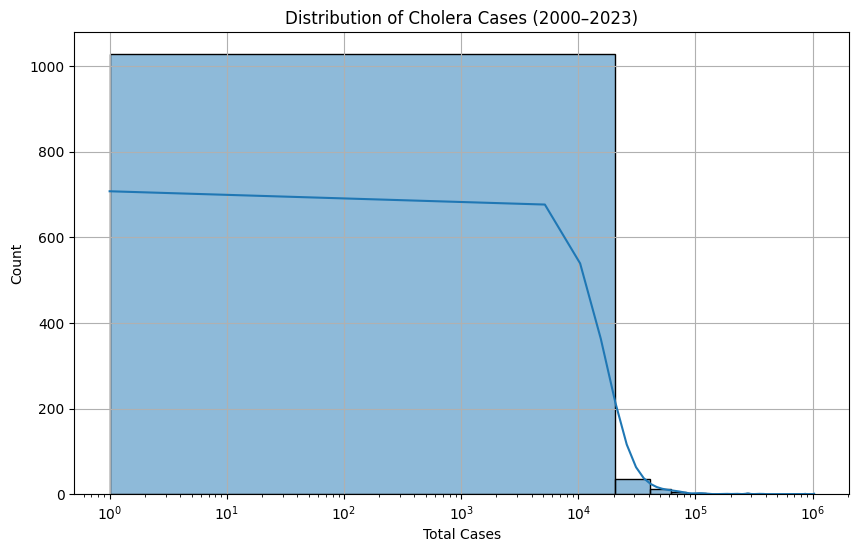

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Cases'], bins=50, kde=True)
plt.title('Distribution of Cholera Cases (2000–2023)')
plt.xlabel('Total Cases')
plt.xscale('log')  # Log-scale due to right-skew
plt.grid(True)
plt.show()

Top countries by total cases

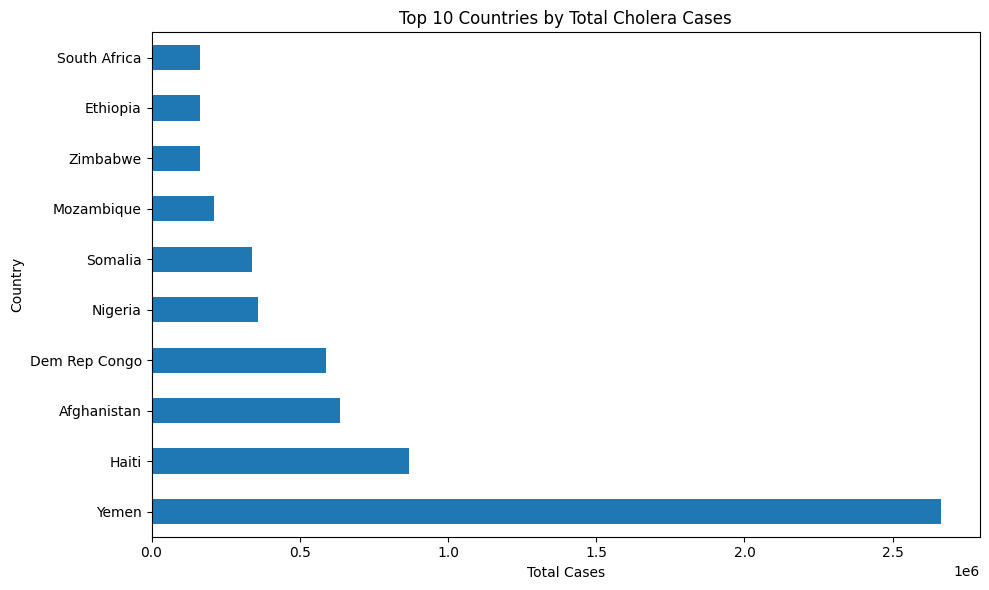

In [11]:
top_countries = df.groupby('Country')['Total_Cases'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh', title='Top 10 Countries by Total Cholera Cases')
plt.xlabel("Total Cases")
plt.tight_layout()
plt.show()

Temporal trend of total cases

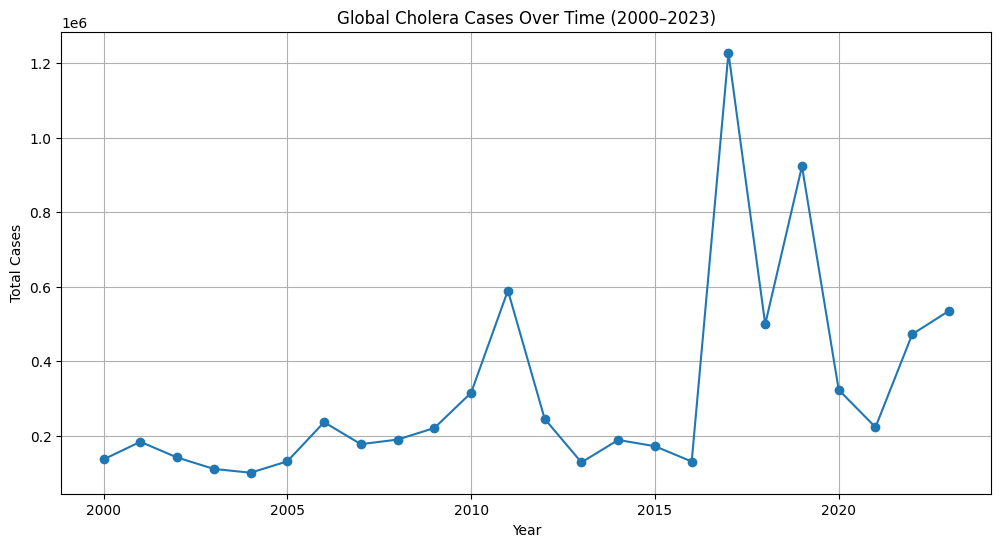

In [12]:
plt.figure(figsize=(12, 6))
df.groupby(df['Year'].dt.year)['Total_Cases'].sum().plot(marker='o')
plt.title('Global Cholera Cases Over Time (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()

Correlation matrix

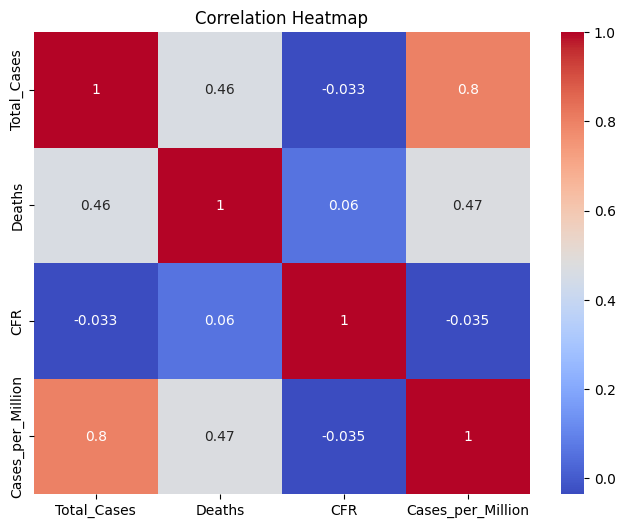

In [13]:
plt.figure(figsize=(8, 6))
corr = df[['Total_Cases', 'Deaths', 'CFR', 'Cases_per_Million']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

3. Apply a Machine Learning or Clustering Model

In [15]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.2 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/8.7 MB 1.8 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.7 MB 1.8 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.7 MB 1.9 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 2.9/8.7 MB 1.9 MB/s eta 0:00:04
   --------------- ------------------------ 3.4/8.7 MB 1.8 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 1.8 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 1.9 MB/s eta 0:00:03
   --------------------- --------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


Feature selection

In [17]:
X = df[['Year', 'CFR', 'Cases_per_Million', 'WHO_Region_encoded']]
X['Year'] = X['Year'].dt.year
y = df['Outbreak_Size']


C:\Users\DELL\AppData\Local\Temp\ipykernel_6800\1261789537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = X['Year'].dt.year


Train-test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature scaling

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model training

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predictions

In [21]:
y_pred = model.predict(X_test_scaled)

Evaluation

In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    Epidemic       0.62      0.45      0.53        22
       Large       0.65      0.67      0.66        52
      Medium       0.61      0.61      0.61        49
       Small       0.90      0.94      0.92        96

    accuracy                           0.75       219
   macro avg       0.70      0.67      0.68       219
weighted avg       0.75      0.75      0.75       219

Confusion Matrix:
[[10 11  1  0]
 [ 4 35 13  0]
 [ 2  7 30 10]
 [ 0  1  5 90]]


4. Evaluate the Model


Classification Report:
              precision    recall  f1-score   support

    Epidemic       0.62      0.45      0.53        22
       Large       0.65      0.67      0.66        52
      Medium       0.61      0.61      0.61        49
       Small       0.90      0.94      0.92        96

    accuracy                           0.75       219
   macro avg       0.70      0.67      0.68       219
weighted avg       0.75      0.75      0.75       219



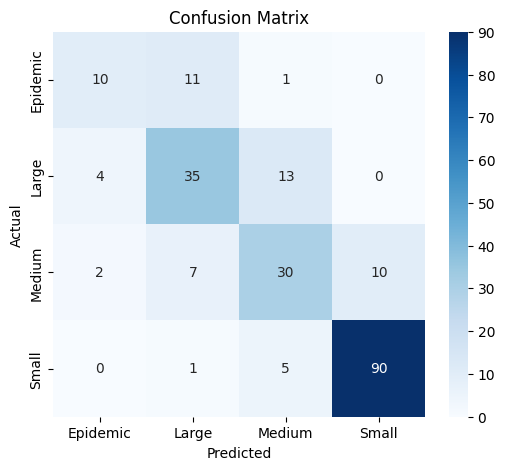

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Structure Your Code Properly

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Data Cleaning Function
# -----------------------------
def clean_data(df):
    """
    Handle missing values, recalculate CFR, remove outliers, 
    engineer new features, and encode categorical variables.
    """
    df['Deaths'].fillna(0, inplace=True)
    df['CFR'] = (df['Deaths'] / df['Total_Cases']).replace(np.inf, 0) * 100
    df['CFR'].fillna(0, inplace=True)
    df = df[df['CFR'] <= 50]  # remove outliers
    df['Cases_per_Million'] = df['Incidence_Rate_perMillion']
    df['Outbreak_Size'] = pd.cut(df['Total_Cases'],
                                 bins=[0, 100, 1000, 10000, np.inf],
                                 labels=['Small', 'Medium', 'Large', 'Epidemic'])
    df['WHO_Region_encoded'] = df['WHO_Region'].astype('category').cat.codes
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')
    return df

# -----------------------------
# 2. Model Training Function
# -----------------------------
def train_model(df):
    """
    Split the data, scale features, train a Random Forest Classifier,
    and return model, scaler, and test set for evaluation.
    """
    X = df[['Year', 'CFR', 'Cases_per_Million', 'WHO_Region_encoded']]
    X['Year'] = X['Year'].dt.year
    y = df['Outbreak_Size']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    return model, scaler, X_test_scaled, y_test

# -----------------------------
# 3. Evaluation Function
# -----------------------------
def evaluate_model(model, X_test_scaled, y_test):
    """
    Evaluate the model and visualize performance with a confusion matrix.
    """
    y_pred = model.predict(X_test_scaled)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()


6. Innovation Component


Dynamic Risk Alert System

In [26]:
!pip install geopandas contextily
import geopandas as gpd
import contextily as ctx



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.2 MB 628.9 kB/s eta 0:00:30
   - -------------------------------------- 0.8/19.2 MB 696.6 kB/s eta 0:00:27
   - -------------------------------------- 0.8/19.2 MB 696.6 kB/s eta 0:00:27
   -- ------------------------------------- 1.0/19.2 MB 733.6 kB/s eta 0:00:25
   -- ------------------------------------- 1.0/19.2 MB 733.6 kB/s eta 0:00:25
   -- ------------------------------------- 1.3/19.2 MB 718.7 kB/s eta 0:00:25
   --- ------------------------------------ 1.6/19.2 MB 725.3 kB/s eta 0:00:25
   --- ------------------------------------ 1.6/19.2 MB 725.3 kB/s eta 0:00:25
   --- -----------

In [31]:
def risk_alert(df, threshold_cfr=5, threshold_cases=1000):
    """Flag high-risk outbreaks based on CFR and case count."""
    high_risk = df[(df['CFR'] > threshold_cfr) & (df['Total_Cases'] > threshold_cases)]
    return high_risk[['Country', 'Year', 'Total_Cases', 'CFR']]

high_risk_countries = risk_alert(df)
print("High-Risk Outbreaks:")
print(high_risk_countries)

High-Risk Outbreaks:
            Country       Year  Total_Cases        CFR
156        Cameroon 2019-01-01         1840   5.054348
186        Cameroon 2018-01-01         1052   5.513308
223            Chad 2017-01-01         1266   6.793049
337        Cameroon 2014-01-01         3355   5.484352
382           Congo 2013-01-01         1624  13.608374
422          Angola 2012-01-01         1215   8.065844
470          Angola 2011-01-01         1810   6.077348
533        Cameroon 2010-01-01        10759   6.106515
557           Niger 2010-01-01         1154   5.719237
700           Kenya 2007-01-01         1206   5.555556
747          Guinea 2006-01-01         3242   6.755089
761           Niger 2006-01-01         1232   6.574675
762         Nigeria 2006-01-01         2028   6.262327
811            Mali 2005-01-01         1178   6.451613
855          Guinea 2004-01-01         1516   7.717678
866            Mali 2004-01-01         2839   7.220852
870         Nigeria 2004-01-01         3186 